In [1]:
%matplotlib inline
from pprint import pprint
import itertools

from market import Returns_US_1871
from simulate import simulate_withdrawals
from harvesting import N_60_RebalanceHarvesting
from metrics import average, mean, median
from withdrawal import ConstantWithdrawals

In [5]:
def sim3(series):
    x = simulate_withdrawals(series, years=30, withdraw=ConstantWithdrawals, portfolio=(600000,400000))
    bonds_prime = [n.portfolio_bonds / n.portfolio_n * 100 for n in x]
    portfolio_prime = [n.portfolio_n for n in x]   
    return (bonds_prime, portfolio_prime)


from decimal import setcontext, ExtendedContext, Decimal
setcontext(ExtendedContext)
import math

r = Returns_US_1871()
total = 0
bondzero = 0
lowest_bonds = []
highest_bonds = []
final_port = []
failures = 0
all_bonds = []
for year in range(1871, 2015):
    y = sim3(r.iter_from(year))
    if 0 in y[0]:
        #print('Bonds hit zero in %d' % year)
        bondzero += 1
    total += 1
    lowest_bonds.append(min(y[0]))
    highest_bonds.append(max(y[0]))
    final_port.append(y[1][-1])

    def f(x):
        if math.isnan(x):
            return Decimal(0)
        else:
            return x

    all_bonds.append(average(map(f, y[0])))
    if y[1][-1] == 0:
        failures += 1
        #print("Failure in", year)
print("Hit zero bonds", bondzero, "out of", total)
print("Failures", failures, "out of", total)
print("Bond average", average(all_bonds))
print("Lowest average", average(lowest_bonds), "Highest average", average(highest_bonds))
print("Final portfolio", average(final_port))
#print(average(filter(lambda x: x != 0, lowest_bonds)))

Hit zero bonds 44 out of 144
Failures 1 out of 144
Bond average 43.3836857316
Lowest average 19.7218515948 Highest average 62.4950149174
Final portfolio 2762976.86572


9.28637218867


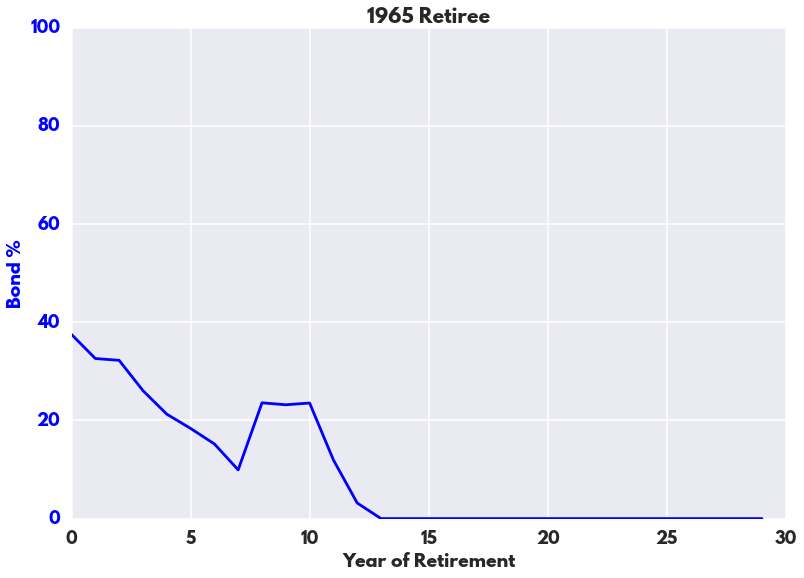

In [17]:
from plot import plot, plt, format_axis_labels_with_commas

def p(bonds, portfolio):
    fig, ax1 = plt.subplots()
    ax1.plot(bonds, 'b')
    ax1.set_ylabel('Bonds Percentage', color='b')
    ax1.set_xlabel('Year of Retirement')
    ax1.set_ylim([0,100])
    for tl in ax1.get_yticklabels():
        tl.set_color('b')

    ax2 = ax1.twinx()
    ax2.plot(portfolio, 'g')
    ax2.set_ylabel('Portfolio Value', color='g')
    ax2.set_ylim([0,2000000])
    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    format_axis_labels_with_commas(ax2.get_yaxis())

    plt.xlabel('Year of Retirement')
    plt.title('Bonds versus Portfolio')
    plt.show()


r = Returns_US_1871()
year = 1965
y = sim3(r.iter_from(year))
print(average(y[0]))
plot(y[0], y_label='Bond %', x_label='Year of Retirement', y_lim=(0,100), title='%d Retiree' % year)